# Coffe Shop Sales

## Importando bibliotecas

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

## Carregando dados

In [2]:
df = pd.read_excel('Coffee_Shop_Sales.xlsx')

## Explorando os dados

In [3]:
df.head() 

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
#informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [9]:
df.shape

(149116, 11)

In [8]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [5]:
# Estatísticas descritivas básicas
df[['transaction_qty','unit_price']].describe()

,transaction_qty,unit_price
count,149116.000000,149116.000000
mean,1.438276,3.382219
std,0.542509,2.658723
min,1.000000,0.800000
25%,1.000000,2.500000
50%,1.000000,3.000000
75%,2.000000,3.750000
max,8.000000,45.000000


In [6]:
produto_mais_caro = df[df['unit_price'] == 45].groupby('product_detail').size()
produto_mais_caro

product_detail
Civet Cat    190
dtype: int64

In [7]:
produto_mais_barato = df[df['unit_price'] == 0.8].groupby('product_detail').size()
produto_mais_barato

product_detail
Carmel syrup                1725
Chocolate syrup             1733
Hazelnut syrup              1521
Sugar Free Vanilla syrup    1811
dtype: int64

## Análise Exploratória dos Dados

Qual o produto mais vendido?

In [10]:
produto_venda = df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending=False).head(10)
produto_venda

product_detail
Earl Grey Rg                   4708
Dark chocolate Lg              4668
Morning Sunrise Chai Rg        4643
Latte                          4602
Peppermint Rg                  4564
Columbian Medium Roast Rg      4547
Traditional Blend Chai Rg      4512
Latte Rg                       4497
Our Old Time Diner Blend Sm    4484
Serenity Green Tea Rg          4477
Name: transaction_qty, dtype: int64

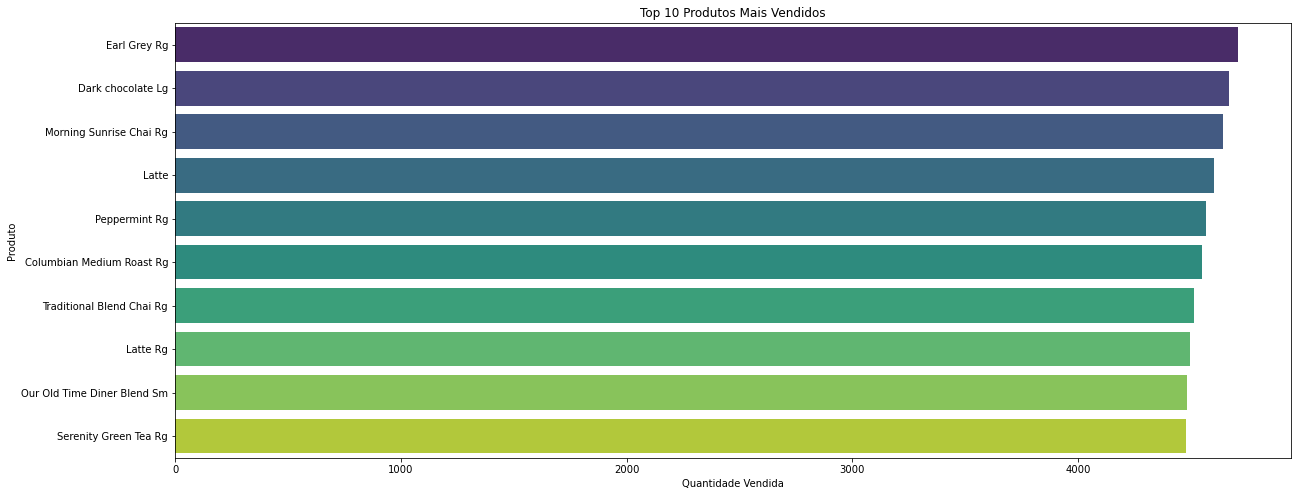

In [11]:
plt.figure(figsize=(20,8))
sns.barplot(x=produto_venda.values, y=produto_venda.index, palette="viridis")
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.show()

Qual é a categoria de produto que traz a maior receita?

In [12]:
df['receita_total'] = df['transaction_qty']*df['unit_price']

In [13]:
categoria_receita = df.groupby('product_category')['receita_total'].sum().sort_values(ascending=False)
categoria_receita

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: receita_total, dtype: float64

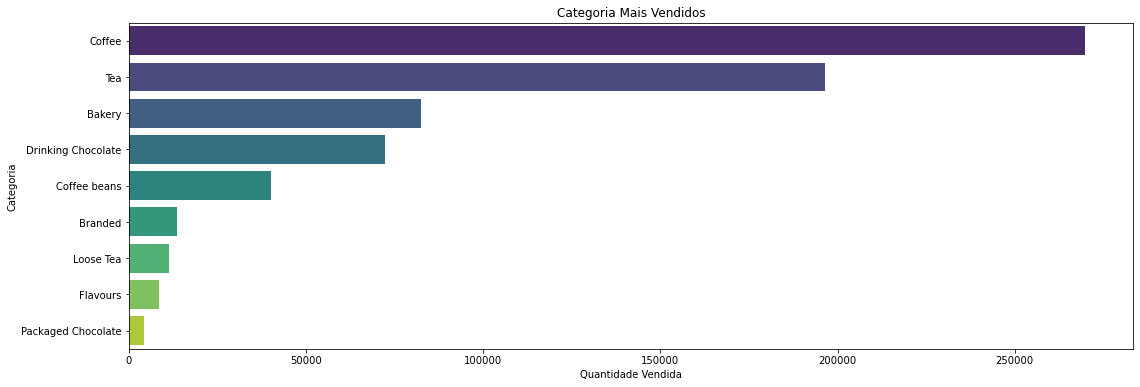

In [14]:
plt.figure(figsize=(18,6))
sns.barplot(x=categoria_receita.values, y=categoria_receita.index, palette="viridis")
plt.title('Categoria Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Categoria')
plt.show()

Qual a receita média por cada tipo de produto?

In [15]:
receita_media_tipo = df.groupby('product_type')['receita_total'].mean().sort_values(ascending=False).head(10)
receita_media_tipo

product_type
Premium Beans         43.403274
Clothing              27.886878
Organic Beans         20.504819
Gourmet Beans         18.573770
House blend Beans     18.000000
Espresso Beans        17.430251
Housewares            14.152091
Drinking Chocolate    10.255789
Green beans           10.000000
Chai tea               9.709368
Name: receita_total, dtype: float64

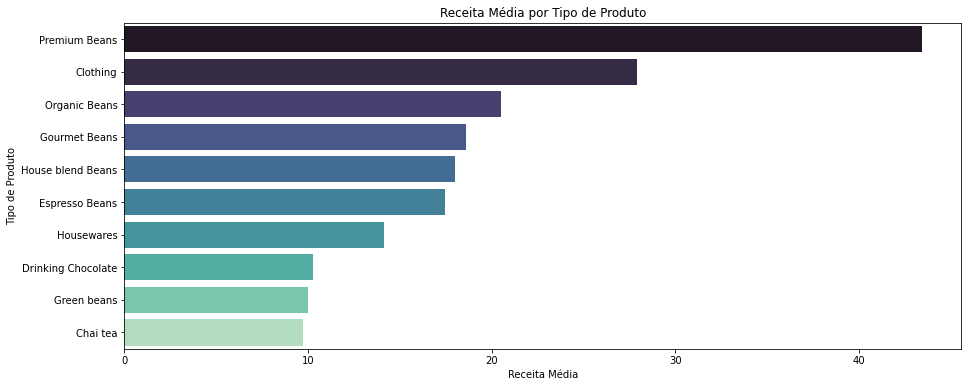

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x=receita_media_tipo.values, y=receita_media_tipo.index, palette="mako")
plt.title('Receita Média por Tipo de Produto')
plt.xlabel('Receita Média')
plt.ylabel('Tipo de Produto')
plt.show()

Qual a receita média por loja?

In [17]:
receita_media_loja = df.groupby('store_location')['receita_total'].mean().sort_values(ascending=False)
receita_media_loja

store_location
Lower Manhattan    4.814726
Hell's Kitchen     4.661696
Astoria            4.589891
Name: receita_total, dtype: float64

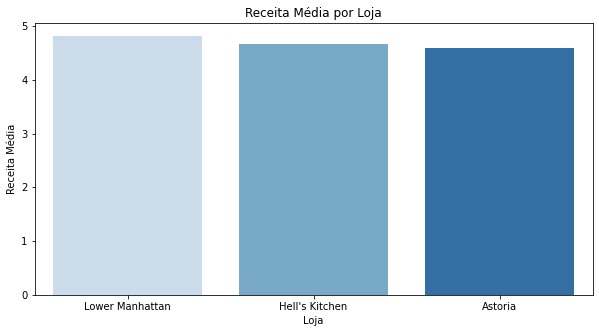

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=receita_media_loja.index, y=receita_media_loja.values, palette='Blues')
plt.title('Receita Média por Loja')
plt.xlabel('Loja')
plt.ylabel('Receita Média')
plt.show()

Quais as lojas que trazem mais ou menos receita?

In [19]:
receita_loja = df.groupby('store_location')['receita_total'].sum().sort_values(ascending=False)
receita_loja

store_location
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: receita_total, dtype: float64

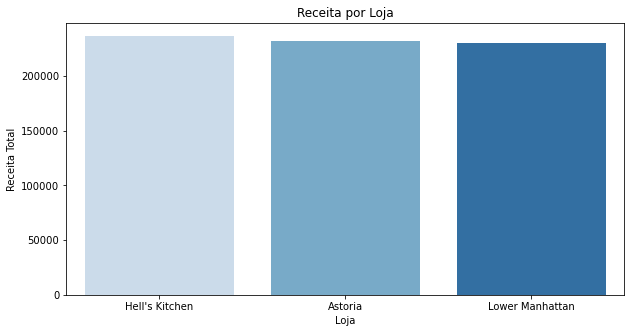

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=receita_loja.index, y=receita_loja.values, palette='Blues')
plt.title('Receita por Loja')
plt.xlabel('Loja')
plt.ylabel('Receita Total')
plt.show()

Existe algum padrão nos horários das transações, seja por produto, loja ou região?

In [21]:
# Agregar vendas por dia
vendas_dia = df.groupby('transaction_date')['receita_total'].sum()
vendas_dia

transaction_date
2023-01-01    2508.20
2023-01-02    2403.35
2023-01-03    2565.00
2023-01-04    2220.10
2023-01-05    2418.85
               ...   
2023-06-26    5875.90
2023-06-27    5975.65
2023-06-28    4728.90
2023-06-29    4450.75
2023-06-30    5481.32
Name: receita_total, Length: 181, dtype: float64

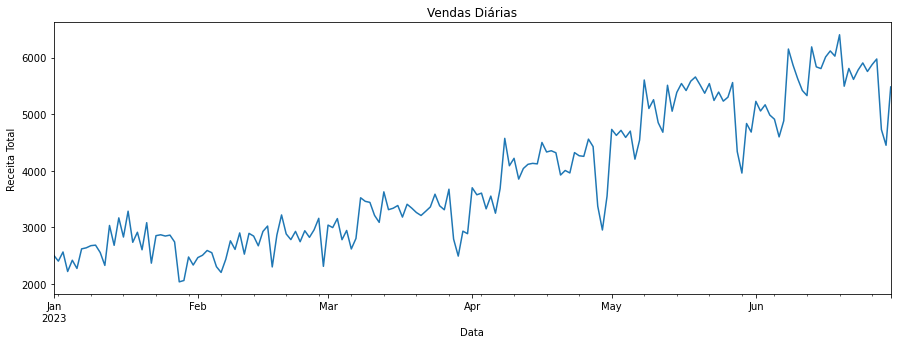

In [22]:
plt.figure(figsize=(15,5))
vendas_dia.plot()
plt.title('Vendas Diárias')
plt.xlabel('Data')
plt.ylabel('Receita Total')
plt.show()

In [23]:
# Converter transaction_time para datetime
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time

# Criar coluna com a hora apenas
df['transacao_hora'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

# Vendas por hora
vendas_hora = df.groupby('transacao_hora')['transaction_qty'].sum()
vendas_hora

transacao_hora
6      6865
7     19449
8     25197
9     25370
10    26713
11    14035
12    12690
13    12439
14    12907
15    12923
16    12881
17    12700
18    10826
19     8595
20      880
Name: transaction_qty, dtype: int64

In [24]:
media_vendas_hora = df.groupby('transacao_hora')['transaction_qty'].mean()
media_vendas_hora

transacao_hora
6     1.494340
7     1.448391
8     1.427269
9     1.428169
10    1.440442
11    1.437129
12    1.457281
13    1.427473
14    1.444867
15    1.439247
16    1.416584
17    1.452258
18    1.443852
19    1.410867
20    1.459370
Name: transaction_qty, dtype: float64

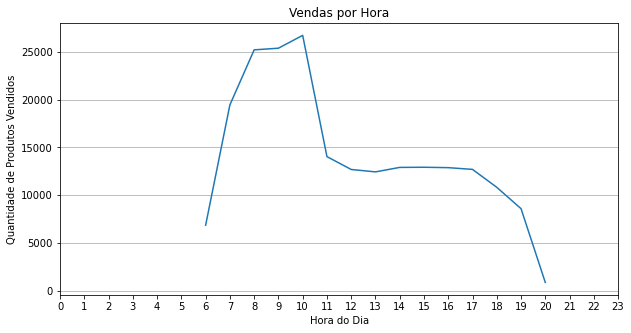

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(x=vendas_hora.index, y=vendas_hora.values, palette='Blues')
plt.title('Vendas por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

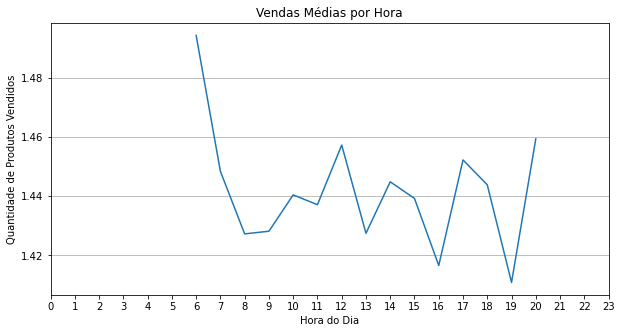

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x=media_vendas_hora.index, y=media_vendas_hora.values, palette='Blues')
plt.title('Vendas Médias por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()